In [10]:
%matplotlib notebook
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt

In [11]:
#Data Preparation
df = pd.read_csv('The National Centers for Environmental Information.csv')
df['Date']=df.Date.map(pd.to_datetime)
df['Month']=df['Date'].dt.month
df['Day']=df['Date'].dt.day
df['Year']=df['Date'].dt.year
df=df.sort_values(['Year','Month','Date']).reset_index()
df['Data_Value'] = df['Data_Value']/10 # to convert to "celsius"

<IPython.core.display.Javascript object>


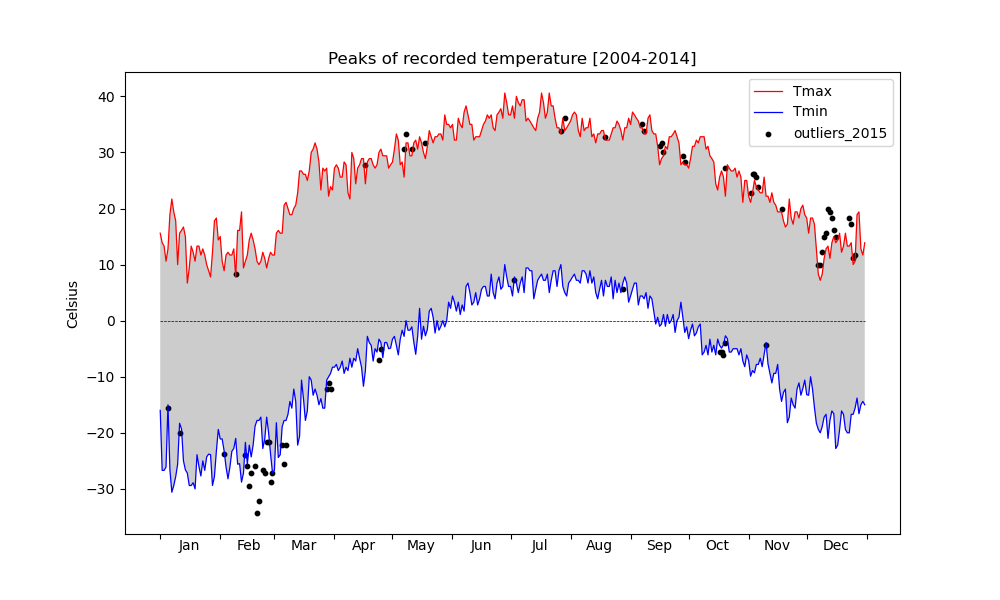

In [12]:
#Point 1. 
#line graph of the record high and record low temperatures by day of the year over the period 2005-2014. 
#The area between the record high and record low temperatures for each day should be shaded.
df1=df.loc[df.Year != 2015,:]
df1=df1.pivot_table(values='Data_Value',index=['Month','Day'],columns='Element', aggfunc=('max','min')).reset_index()

## remove data from 29th of February
df1.drop(df1.loc[(df1.Month==2) & (df1.Day==29), :].index, inplace=True)
df1.reset_index(inplace=True)


plt.figure(figsize=(10,6))
#dict month / days of the month
months={'Jan':31, 'Feb':28, 'Mar':31, 'Apr':30, 'May':31, 'Jun':30, 'Jul':31, 'Aug':31, 'Sep':30, 'Oct':31, 'Nov':30, 'Dec':31}

#setting the ticks
ticks = [0]
for month in months:
    x = ticks[-1]
    ticks.append(x+months[month])

#setting the minor ticks in order to get labels centered    
ticks_moved = [(x+15) for x in ticks]
ticks_moved.remove(ticks_moved[-1])

#plotting
ymax = list(df1['max']['TMAX'])
ymin = list(df1['min']['TMIN'])
plt.plot(ymax, '-r', label='Tmax', linewidth=0.9)
plt.plot(ymin,'-b', label='Tmin', linewidth=0.9)
plt.plot(([0]*len(ymax)),'--k', linewidth=0.5)


#setting the axis
ax=plt.gca()
ax.set_xticks(ticks)
ax.set_xticks(ticks_moved, minor=True)
ax.set_xticklabels('')
ax.set_xticklabels(months.keys(), minor=True, ha = 'center')
ax.tick_params(axis='x', which='minor',length=0)
ax.fill_between(range(len(ymax)),ymax, ymin, facecolor='black',alpha=0.2)

#setting title
ax.set_title('Peaks of recorded temperature [2004-2014]')
ax.set_ylabel('Celsius')


#Point 2. 
#Overlay a scatter of the 2015 data for any points (highs and lows) 
#for which the ten year record (2005-2014) record high or record low was broken in 2015.

df2=df.loc[df.Year == 2015,:]
df2=df2.pivot_table(values='Data_Value',index=['Month','Day'],columns='Element', aggfunc=('max','min')).reset_index()
max2015=df2['max'].TMAX
min2015=df2['min'].TMIN
df_outliers=pd.DataFrame({'max2015':max2015, 'min2015':min2015, 'ymax':ymax, 'ymin':ymin})
def check_outliers(series, edge, up=True):
    if up==True:
        out=[]
        for x in zip(series, edge):
            if x[0]>x[1]:
                out.append(x[0])
            else:
                out.append(0)
    if up==False:
        out=[]
        for x in zip(series, edge):
            if x[0]<x[1]:
                out.append(x[0])
            else:
                out.append(0)
    return out
df_outliers['out2015_up'] = check_outliers(df_outliers['max2015'], df_outliers['ymax'])
df_outliers['out2015_down'] = check_outliers(df_outliers['min2015'], df_outliers['ymin'], up=False)
df_outliers
plt.scatter(df_outliers[df_outliers['out2015_up']!=0].index,
           df_outliers[df_outliers['out2015_up']!=0]['out2015_up'],
           s=10,c='k', label='outliers_2015')
plt.scatter(df_outliers[df_outliers['out2015_down']!=0].index,
           df_outliers[df_outliers['out2015_down']!=0]['out2015_down'],
           s=10,c='k', label=None)

plt.legend()
plt.show()